In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('Data.xlsx')

In [3]:
#Suppression de la première et des 12 dernières colonnes.Quasiment illisible
df.drop(df.columns[[0, 1,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,-11,-12]],inplace=True,axis=1)

In [4]:
#Suppression de toutes nos features contenant des valeurs nulles.
df.dropna(axis=1, inplace=True)
df.head()

,sex,group,breed_size,Breed,Litter_size,Dead,Diarr_1m,Diarr_2m,weight_D1,IgG_dam,age_dam
0,M,EL,S,Poodle,1,1,0,0,223,8.412161,6
1,M,OO,S,Lhasa Apso,6,0,1,0,167,6.001322,3
2,F,OL,S,Lhasa Apso,6,0,1,0,165,6.001322,3
3,F,OO,S,Lhasa Apso,6,1,0,0,182,6.001322,3
4,F,OL,S,Lhasa Apso,6,1,0,0,178,6.001322,3


In [5]:
first_column = df.pop('Dead') 
df.insert(0, 'Dead', first_column) 
df.head()

,Dead,sex,group,breed_size,Breed,Litter_size,Diarr_1m,Diarr_2m,weight_D1,IgG_dam,age_dam
0,1,M,EL,S,Poodle,1,0,0,223,8.412161,6
1,0,M,OO,S,Lhasa Apso,6,1,0,167,6.001322,3
2,0,F,OL,S,Lhasa Apso,6,1,0,165,6.001322,3
3,1,F,OO,S,Lhasa Apso,6,0,0,182,6.001322,3
4,1,F,OL,S,Lhasa Apso,6,0,0,178,6.001322,3


In [6]:
df['sex']=pd.Categorical(df['sex'],ordered=False)
df['group']=pd.Categorical(df['group'],ordered=False)
df['breed_size']=pd.Categorical(df['breed_size'],ordered=False)
df['Breed']=pd.Categorical(df['Breed'],ordered=False)

In [7]:
# Chiots de petite race
df_S = df[df['breed_size']=='S']
# Chiots de grande race
df_L = df[df['breed_size']=='L']

In [8]:
#Labélisation de nos données catégorielles en utilisant la méthode LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['group'] = label_encoder.fit_transform(df['group'])
df['Breed'] = label_encoder.fit_transform(df['Breed'])
df['breed_size'] = label_encoder.fit_transform(df['breed_size'])

df['sex'] = df['sex'].replace(to_replace={'M':1,'F':0})

In [9]:
#Labélisation de nos données catégorielles en utilisant la méthode LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df_S['group'] = label_encoder.fit_transform(df_S['group'])
df_S['Breed'] = label_encoder.fit_transform(df_S['Breed'])
df_S['breed_size'] = label_encoder.fit_transform(df_S['breed_size'])

df_S['sex'] = df_S['sex'].replace(to_replace={'M':1,'F':0})

X = df_S.drop("Dead",1) # feature matrix
y = df_S["Dead"] # target feature

<ipython-input-9-17f1d8564889>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_S['group'] = label_encoder.fit_transform(df_S['group'])
<ipython-input-9-17f1d8564889>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_S['Breed'] = label_encoder.fit_transform(df_S['Breed'])
<ipython-input-9-17f1d8564889>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [10]:
#Labélisation de nos données catégorielles en utilisant la méthode LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df_L['group'] = label_encoder.fit_transform(df_L['group'])
df_L['Breed'] = label_encoder.fit_transform(df_L['Breed'])
df_L['breed_size'] = label_encoder.fit_transform(df_L['breed_size'])

df_L['sex'] = df_L['sex'].replace(to_replace={'M':1,'F':0})

X = df_S.drop("Dead",1) # feature matrix
y = df_S["Dead"] # target feature

<ipython-input-10-edc56e85b2e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_L['group'] = label_encoder.fit_transform(df_L['group'])
<ipython-input-10-edc56e85b2e6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_L['Breed'] = label_encoder.fit_transform(df_L['Breed'])
<ipython-input-10-edc56e85b2e6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

## Filter

In [11]:
df_S_Filter=df_S.drop('breed_size',axis=1)
df_L_Filter=df_L.drop('breed_size',axis=1)

### Dataset complet

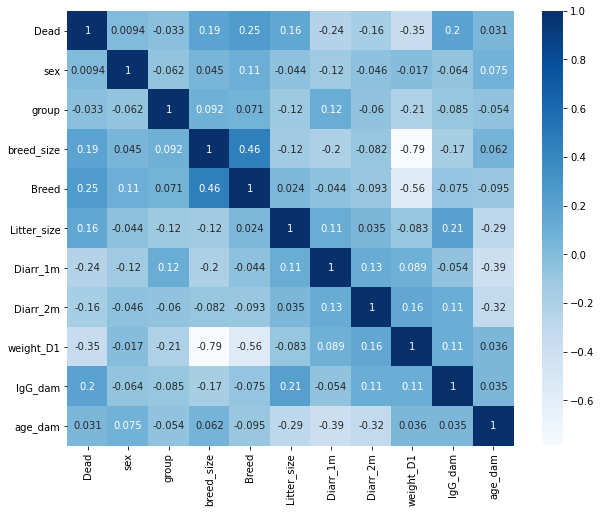

In [12]:
plt.figure(figsize=(10,8))
corr=df.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Blues)
plt.show()

### Dataset races de petite taille

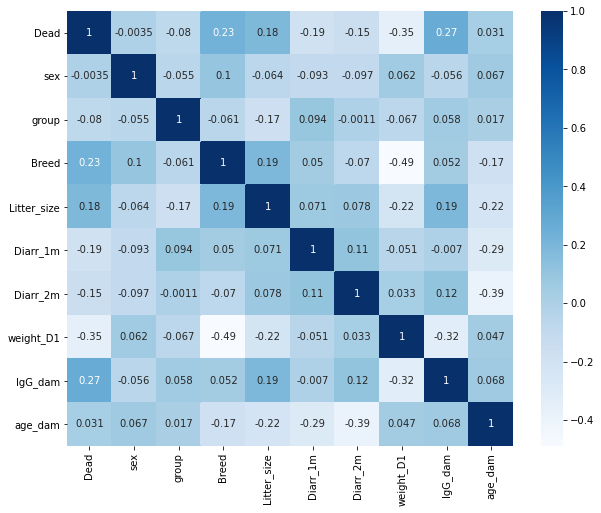

In [13]:
plt.figure(figsize=(10,8))
corr=df_S_Filter.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Blues)
plt.show()

### Dataset races de grande taille

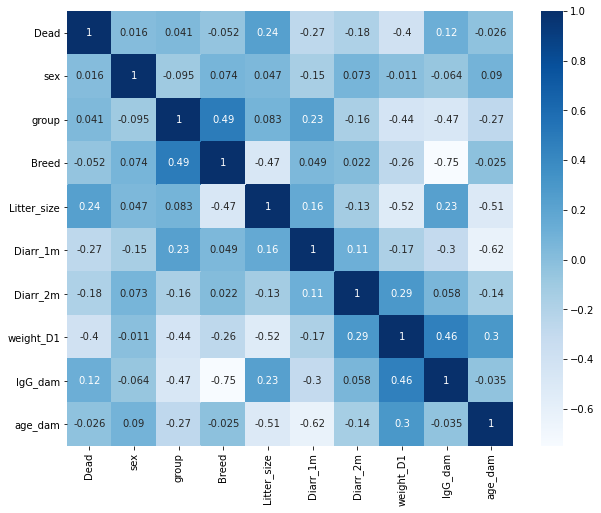

In [14]:
plt.figure(figsize=(10,8))
corr=df_L_Filter.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Blues)
plt.show()

## Wrapper

### Dataset complet

In [80]:
X = df.drop(["Dead","Breed","breed_size"],1) # feature matrix
y = df["Dead"] # target feature

In [82]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LogisticRegression(),
          k_features=3,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

sfs.fit(X,y)
print('Régression logistique :')
sfs.k_feature_names_

Régression logistique :


('Diarr_1m', 'Diarr_2m', 'weight_D1')

### Dataset races de petite taille

In [38]:
X = df_S.drop(["Dead","breed_size",'Breed'],1) # feature matrix
y = df_S["Dead"] # target feature

#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LogisticRegression(),
          k_features=3,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

sfs.fit(X,y)
print('Régression logistique :')
sfs.k_feature_names_

Régression logistique :


('sex', 'weight_D1', 'age_dam')

### Dataset races de grande taille

In [18]:
X = df_L.drop("Dead",1)# feature matrix
y = df_L["Dead"] # target feature

#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LogisticRegression(),
          k_features=3,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

sfs.fit(X,y)
print('Régression logistique :')
sfs.k_feature_names_

Régression logistique :


('sex', 'group', 'weight_D1')

## Embedded

### Dataset complet

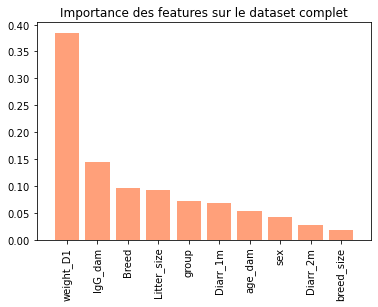

Index(['weight_D1', 'IgG_dam', 'Breed', 'Litter_size', 'group', 'Diarr_1m',
       'age_dam', 'sex', 'Diarr_2m', 'breed_size'],
      dtype='object')


In [65]:
from sklearn.ensemble import RandomForestClassifier
X = df.drop("Dead",1) # feature matrix
y = df["Dead"] # target feature

rf = RandomForestClassifier(n_estimators = 100, 
                            class_weight='balanced', random_state=42)

rf.fit(X, y)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Importance des features sur le dataset complet")
plt.bar(range(X.shape[1]), importances[indices],
        color="lightsalmon", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

print(X.columns[indices])

### Dataset race de petite taille

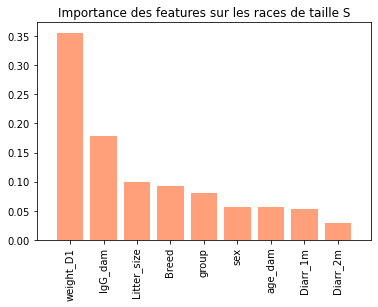

In [20]:
from sklearn.ensemble import RandomForestClassifier
X = df_S.drop("Dead",1) # feature matrix
y = df_S["Dead"] # target feature
X = X.drop("breed_size",1)

rf = RandomForestClassifier(n_estimators = 100, 
                            class_weight='balanced', random_state=42)

rf.fit(X, y)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Importance des features sur les races de taille S")
plt.bar(range(X.shape[1]), importances[indices],
        color="lightsalmon", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

### Dataset race de grande taille

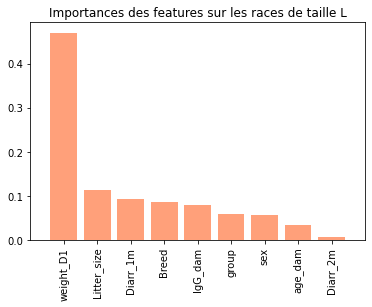

In [21]:
from sklearn.ensemble import RandomForestClassifier
X = df_L.drop("Dead",1) # feature matrix
y = df_L["Dead"] # target feature
X = X.drop("breed_size",1)

rf = RandomForestClassifier(n_estimators = 100, 
                            class_weight='balanced', random_state=42)

rf.fit(X, y)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Importances des features sur les races de taille L")
plt.bar(range(X.shape[1]), importances[indices],
        color="lightsalmon", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()